In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

# Training and Validation

In [2]:
folder = 'bert-base-cased' 
directory = f'..\\Metrics_results\\{folder}\\training/binary\\{folder}_training_*.pkl'
file_list, training_data = glob.glob(directory), []

for pkl_file in file_list:
    with open(pkl_file, 'rb') as file:
        training_data.append(pkl.load(file))
training_data 

[{'epoch': 0,
  'loss': 0.022074485197663307,
  'auc_roc_macro': 0.847015380859375,
  'f1 Macro': 0.7283079028129578,
  'precision_macro': 0.9428887367248535,
  'recall_macro': 0.5932884812355042},
 {'epoch': 1,
  'loss': 0.018894772976636887,
  'auc_roc_macro': 0.8853387832641602,
  'f1 Macro': 0.7509762644767761,
  'precision_macro': 0.965825617313385,
  'recall_macro': 0.614319920539856},
 {'epoch': 2,
  'loss': 0.01779218204319477,
  'auc_roc_macro': 0.8960641622543335,
  'f1 Macro': 0.759347140789032,
  'precision_macro': 0.971767246723175,
  'recall_macro': 0.6231350898742676}]

In [3]:
folder = 'bert-base-cased' 
directory = f'..\\Metrics_results\\{folder}\\validation\\binary\\{folder}_validation_*.pkl'
file_list, validation_data = glob.glob(directory), []

for pkl_file in file_list:
    with open(pkl_file, 'rb') as file:
        validation_data.append(pkl.load(file))
validation_data 

[[{'epoch': 0,
   'loss': 0.05384792014956474,
   'auc_roc_macro': 0.5199999809265137,
   'f1 Macro': 0.8771929740905762,
   'precision_macro': 0.78125,
   'recall_macro': 1.0,
   'C/ECE': 0.1220245361328125},
  {'epoch': 0,
   'loss': 0.01712443120777607,
   'auc_roc_macro': 0.9502117037773132,
   'f1 Macro': 0.853042483329773,
   'precision_macro': 0.9859147667884827,
   'recall_macro': 0.7517312169075012,
   'C/ECE': 0.30554595589637756},
  {'epoch': 0,
   'loss': 0.013927709311246872,
   'auc_roc_macro': 0.9561759233474731,
   'f1 Macro': 0.896598756313324,
   'precision_macro': 0.9785813093185425,
   'recall_macro': 0.8272908329963684,
   'C/ECE': 0.2671283781528473},
  {'epoch': 0,
   'loss': 0.014017726294696331,
   'auc_roc_macro': 0.9553846120834351,
   'f1 Macro': 0.8941977024078369,
   'precision_macro': 0.9778247475624084,
   'recall_macro': 0.8237478733062744,
   'C/ECE': 0.24925871193408966}],
 [{'epoch': 1,
   'loss': 0.012886210344731808,
   'auc_roc_macro': 0.960636615

In [4]:
bert_base_cased_val_loss = []
for validation_iter_results in validation_data:
    for result_in_epoch in validation_iter_results:
        bert_base_cased_val_loss.append(dict(epoch= result_in_epoch['epoch'], loss = result_in_epoch['loss']))
        
bert_base_cased_val_loss

[{'epoch': 0, 'loss': 0.05384792014956474},
 {'epoch': 0, 'loss': 0.01712443120777607},
 {'epoch': 0, 'loss': 0.013927709311246872},
 {'epoch': 0, 'loss': 0.014017726294696331},
 {'epoch': 1, 'loss': 0.012886210344731808},
 {'epoch': 1, 'loss': 0.012433699332177639},
 {'epoch': 1, 'loss': 0.012373940087854862},
 {'epoch': 2, 'loss': 0.0126425726339221},
 {'epoch': 2, 'loss': 0.012341600842773914},
 {'epoch': 2, 'loss': 0.012402652762830257}]

# DistilBERT-uncased

In [5]:
folder = 'distilbert-base-uncased' 
directory = f'..\\Metrics_results\\{folder}\\validation\\binary\\{folder}_validation_*.pkl'
file_list, validation_data = glob.glob(directory), []

for pkl_file in file_list:
    with open(pkl_file, 'rb') as file:
        validation_data.append(pkl.load(file))
validation_data 

[]

# Test Set

### BERT Cased

In [6]:
pkl_file, folder = 'BERT-binary-FocalLoss_test', 'bert-base-cased'
with open(f'../Metrics_results/{folder}/training/binary/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

FileNotFoundError: [Errno 2] No such file or directory: '../Metrics_results/bert-base-cased/training/binary/BERT-binary-FocalLoss_test.pkl'

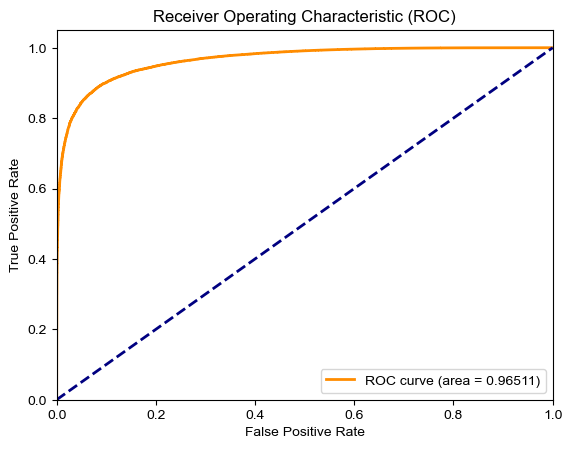

In [4]:
# Extract ROC curve data
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

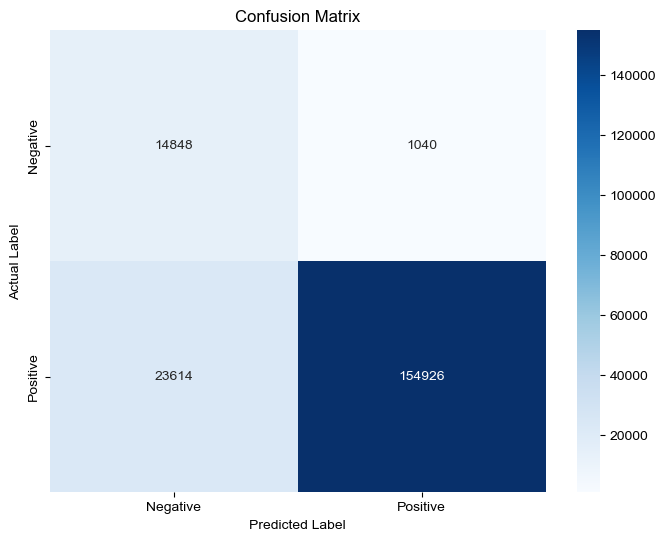

In [5]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [6]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

latex_code = f"""
\\begin{{table}}[h!]
\\centering
\\begin{{tabular}}{{|c|c|}}
\\hline
\\textbf{{Metric}} & \\textbf{{Value}} \\\\
\\hline
Accuracy & {accuracy:.4f} \\\\
F1 Macro & {f1_macro:.4f} \\\\
F1 Micro & {f1_micro:.4f} \\\\
F1 Weighted & {f1_weighted:.4f} \\\\
Precision Macro & {precision_macro:.4f} \\\\
Recall Macro & {recall_macro:.4f} \\\\
AUC Macro & {auc_macro:.4f} \\\\
\\hline
\\end{{tabular}}
\\caption{{Evaluation Metrics}}
\\end{{table}}
"""

# Print LaTeX table
print(latex_code)


\begin{table}[h!]
\centering
\begin{tabular}{|c|c|}
\hline
\textbf{Metric} & \textbf{Value} \\
\hline
Accuracy & 0.8732 \\
F1 Macro & 0.9263 \\
F1 Micro & 0.9263 \\
F1 Weighted & 0.9263 \\
Precision Macro & 0.9933 \\
Recall Macro & 0.8677 \\
AUC Macro & 0.9651 \\
\hline
\end{tabular}
\caption{Evaluation Metrics}
\end{table}



## BERT Uncased

In [15]:
folder = 'BERT-Base-Uncased' 
directory = f'..\\Metrics_results\\{folder}\\validation\\binary\\{folder}_validation_*.pkl'
file_list, validation_data = glob.glob(directory), []

for pkl_file in file_list:
    with open(pkl_file, 'rb') as file:
        validation_data.append(pkl.load(file))
validation_data 

[[{'epoch': 0,
   'loss': 0.041350461542606354,
   'auc_roc_macro': 0.44285714626312256,
   'f1 Macro': 0.8771929740905762,
   'precision_macro': 0.78125,
   'recall_macro': 1.0,
   'C/ECE': 0.2114480584859848},
  {'epoch': 0,
   'loss': 0.01450147945433855,
   'auc_roc_macro': 0.9538407325744629,
   'f1 Macro': 0.8878871202468872,
   'precision_macro': 0.9797259569168091,
   'recall_macro': 0.811790406703949,
   'C/ECE': 0.2719346880912781},
  {'epoch': 0,
   'loss': 0.013970335945487022,
   'auc_roc_macro': 0.9586547017097473,
   'f1 Macro': 0.8900101780891418,
   'precision_macro': 0.982977032661438,
   'recall_macro': 0.8131089210510254,
   'C/ECE': 0.2396150827407837},
  {'epoch': 0,
   'loss': 0.013321884907782078,
   'auc_roc_macro': 0.9586268663406372,
   'f1 Macro': 0.9248461723327637,
   'precision_macro': 0.9668218493461609,
   'recall_macro': 0.8863636255264282,
   'C/ECE': 0.2665749788284302}],
 [{'epoch': 1,
   'loss': 0.013351687230169773,
   'auc_roc_macro': 0.960555315

In [16]:
bert_base_uncased_val_loss = []
for validation_iter_results in validation_data:
    for result_in_epoch in validation_iter_results:
        bert_base_uncased_val_loss.append(dict(epoch= result_in_epoch['epoch'], loss = result_in_epoch['loss']))
        
bert_base_uncased_val_loss

[{'epoch': 0, 'loss': 0.041350461542606354},
 {'epoch': 0, 'loss': 0.01450147945433855},
 {'epoch': 0, 'loss': 0.013970335945487022},
 {'epoch': 0, 'loss': 0.013321884907782078},
 {'epoch': 1, 'loss': 0.013351687230169773},
 {'epoch': 1, 'loss': 0.014518040232360363},
 {'epoch': 1, 'loss': 0.013029737398028374},
 {'epoch': 2, 'loss': 0.01264395285397768},
 {'epoch': 2, 'loss': 0.01255375798791647},
 {'epoch': 2, 'loss': 0.012847022153437138}]

In [7]:
pkl_file, folder = 'BERT-binary-FocalLoss_test', 'BERT-Base-Uncased'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9658279418945312,
  'all_metrics': {'accuracy': tensor(0.8756, device='cuda:0'),
   'auc_roc_macro': tensor(0.9658, device='cuda:0'),
   'confusion_matrix': tensor([[ 14861,   1027],
           [ 23153, 155387]], device='cuda:0'),
   'f1': tensor(0.9278, device='cuda:0'),
   'f1_Macro': tensor(0.9278, device='cuda:0'),
   'f1_Micro': tensor(0.9278, device='cuda:0'),
   'f1_Weighted': tensor(0.9278, device='cuda:0'),
   'precision_macro': tensor(0.9934, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.1290, 0.1291, 0.1294,  ..., 0.8517, 0.8519, 0.8519], device='cuda:0')),
   'recall_macro': tensor(0.8703, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.12

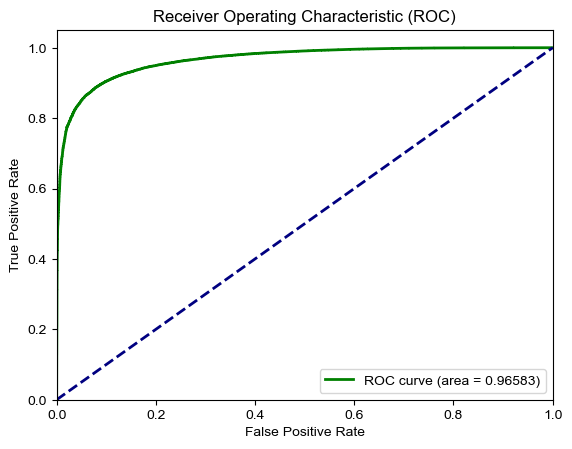

In [8]:
# Extract ROC curve data
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

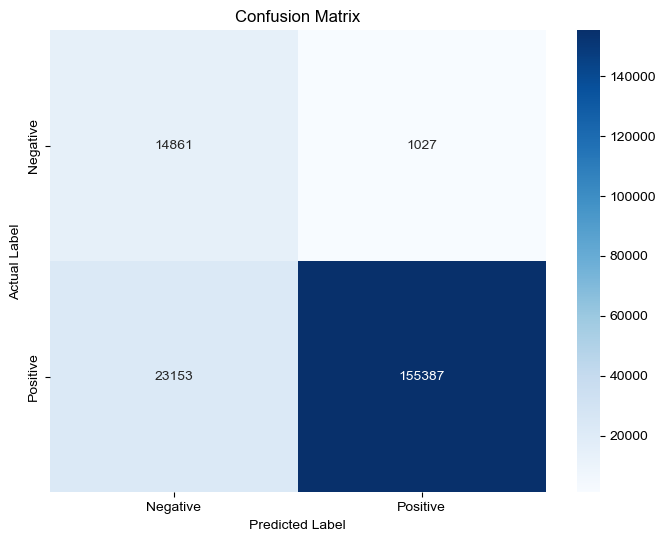

In [9]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.8756352066993713,
 'f1_macro': 0.9278109669685364,
 'f1_micro': 0.9278109669685364,
 'f1_weighted': 0.9278109669685364,
 'precision_macro': 0.9934340715408325,
 'recall_macro': 0.8703203797340393,
 'auc_macro': 0.9658279418945312}

## DistilBERT

In [19]:
folder = 'distilbert-base-cased' 
directory = f'..\\Metrics_results\\{folder}\\validation\\{folder}_validation_*.pkl'
file_list, validation_data = glob.glob(directory), []

for pkl_file in file_list:
    with open(pkl_file, 'rb') as file:
        validation_data.append(pkl.load(file))
validation_data 

[[{'epoch': 0,
   'loss': 0.031241748481988907,
   'auc_roc_macro': 0.5028571486473083,
   'f1 Macro': 0.8771929740905762,
   'precision_macro': 0.78125,
   'recall_macro': 1.0,
   'C/ECE': 0.2539825439453125,
   'accuracy': 0.78125,
   'conf_matrix': tensor([[ 0,  7],
           [ 0, 25]], device='cuda:0'),
   'f1_weighted': 0.8771929740905762},
  {'epoch': 0,
   'loss': 0.013647032901644707,
   'auc_roc_macro': 0.9554051160812378,
   'f1 Macro': 0.9126902222633362,
   'precision_macro': 0.9688680171966553,
   'recall_macro': 0.8626701235771179,
   'C/ECE': 0.25343644618988037,
   'accuracy': 0.8728501796722412,
   'conf_matrix': tensor([[26860,  2754],
           [13644, 85708]], device='cuda:0'),
   'f1_weighted': 0.9126902222633362},
  {'epoch': 0,
   'loss': 0.013244245201349258,
   'auc_roc_macro': 0.9589368104934692,
   'f1 Macro': 0.9186775088310242,
   'precision_macro': 0.9697254300117493,
   'recall_macro': 0.872735321521759,
   'C/ECE': 0.264894038438797,
   'accuracy': 0.8

In [20]:
distilbert_base_cased_val_loss = []
for validation_iter_results in validation_data:
    for result_in_epoch in validation_iter_results:
        distilbert_base_cased_val_loss.append(dict(epoch= result_in_epoch['epoch'], loss = result_in_epoch['loss']))
        
distilbert_base_cased_val_loss

[{'epoch': 0, 'loss': 0.031241748481988907},
 {'epoch': 0, 'loss': 0.013647032901644707},
 {'epoch': 0, 'loss': 0.013244245201349258},
 {'epoch': 0, 'loss': 0.014057471416890621},
 {'epoch': 0, 'loss': 0.05903959274291992},
 {'epoch': 0, 'loss': 0.012595935724675655},
 {'epoch': 0, 'loss': 0.012249477207660675},
 {'epoch': 0, 'loss': 0.014803093858063221},
 {'epoch': 1, 'loss': 0.012554928660392761},
 {'epoch': 1, 'loss': 0.012004920281469822},
 {'epoch': 1, 'loss': 0.011649911291897297},
 {'epoch': 1, 'loss': 0.012720403261482716},
 {'epoch': 1, 'loss': 0.011318044736981392},
 {'epoch': 1, 'loss': 0.010949972085654736},
 {'epoch': 2, 'loss': 0.011617525480687618},
 {'epoch': 2, 'loss': 0.011200899258255959},
 {'epoch': 2, 'loss': 0.011532480828464031},
 {'epoch': 2, 'loss': 0.012226507067680359},
 {'epoch': 2, 'loss': 0.01271180622279644},
 {'epoch': 2, 'loss': 0.011946664191782475}]

In [11]:
pkl_file, folder = 'DistilBERT-binary-FocalLoss_test', 'distilbert-base-cased'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9677959680557251,
  'all_metrics': {'accuracy': tensor(0.9051, device='cuda:0'),
   'auc_roc_macro': tensor(0.9678, device='cuda:0'),
   'confusion_matrix': tensor([[ 14377,   1511],
           [ 16944, 161596]], device='cuda:0'),
   'f1': tensor(0.9460, device='cuda:0'),
   'f1_Macro': tensor(0.9460, device='cuda:0'),
   'f1_Micro': tensor(0.9460, device='cuda:0'),
   'f1_Weighted': tensor(0.9460, device='cuda:0'),
   'precision_macro': tensor(0.9907, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.0876, 0.0885, 0.0889,  ..., 0.9360, 0.9371, 0.9376], device='cuda:0')),
   'recall_macro': tensor(0.9051, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.12

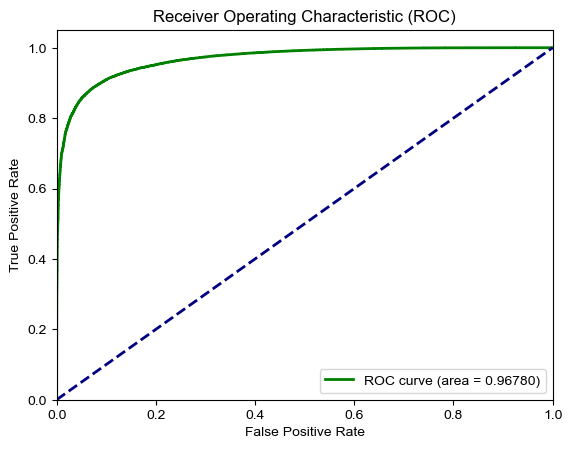

In [12]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

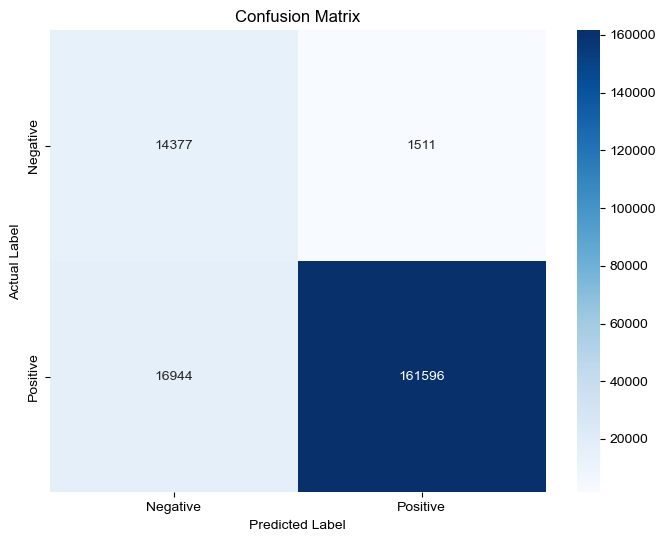

In [13]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.9050805568695068,
 'f1_macro': 0.9459822773933411,
 'f1_micro': 0.9459822773933411,
 'f1_weighted': 0.9459822773933411,
 'precision_macro': 0.9907361268997192,
 'recall_macro': 0.9050968885421753,
 'auc_macro': 0.9677959680557251}

In [15]:
pkl_file, folder = 'DistilBERT-binary-FocalLoss_test', 'distilbert-base-uncased'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9636693596839905,
  'all_metrics': {'accuracy': tensor(0.8729, device='cuda:0'),
   'auc_roc_macro': tensor(0.9637, device='cuda:0'),
   'confusion_matrix': tensor([[ 14786,   1102],
           [ 23603, 154937]], device='cuda:0'),
   'f1': tensor(0.9262, device='cuda:0'),
   'f1_Macro': tensor(0.9262, device='cuda:0'),
   'f1_Micro': tensor(0.9262, device='cuda:0'),
   'f1_Weighted': tensor(0.9262, device='cuda:0'),
   'precision_macro': tensor(0.9929, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.1772, 0.1773, 0.1778,  ..., 0.8663, 0.8690, 0.8699], device='cuda:0')),
   'recall_macro': tensor(0.8678, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.12

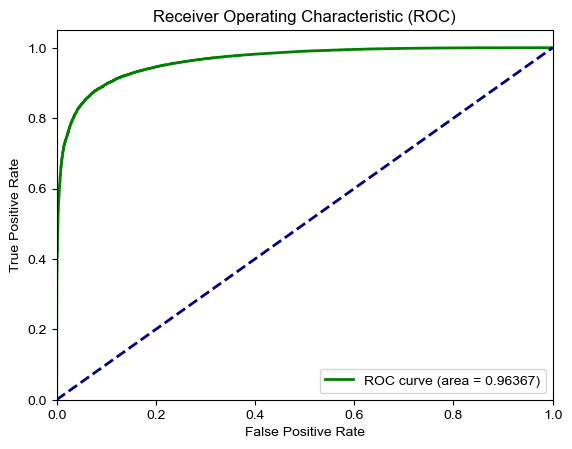

In [16]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

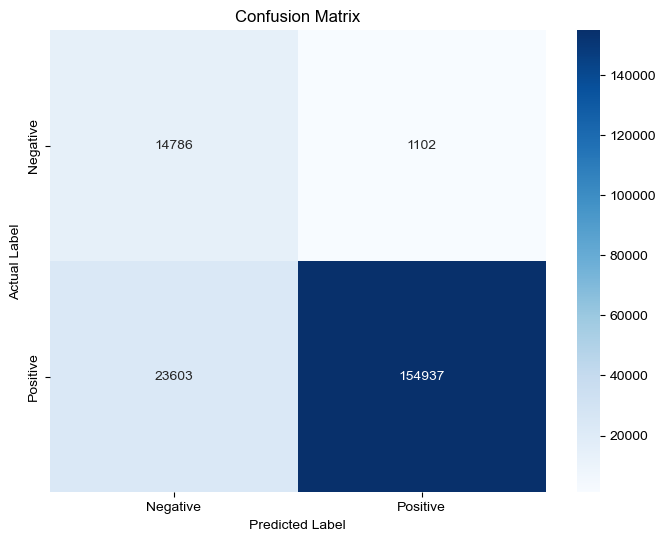

In [17]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.8729349970817566,
 'f1_macro': 0.9261609315872192,
 'f1_micro': 0.9261609315872192,
 'f1_weighted': 0.9261609315872192,
 'precision_macro': 0.9929376840591431,
 'recall_macro': 0.8677999377250671,
 'auc_macro': 0.9636693596839905}

In [19]:
pkl_file, folder = 'HateBERT-binary-FocalLoss_test', 'HateBert'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9667826294898987,
  'all_metrics': {'accuracy': tensor(0.8753, device='cuda:0'),
   'auc_roc_macro': tensor(0.9668, device='cuda:0'),
   'confusion_matrix': tensor([[ 14926,    962],
           [ 23275, 155265]], device='cuda:0'),
   'f1': tensor(0.9276, device='cuda:0'),
   'f1_Macro': tensor(0.9276, device='cuda:0'),
   'f1_Micro': tensor(0.9276, device='cuda:0'),
   'f1_Weighted': tensor(0.9276, device='cuda:0'),
   'precision_macro': tensor(0.9938, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.1528, 0.1529, 0.1530,  ..., 0.8568, 0.8576, 0.8622], device='cuda:0')),
   'recall_macro': tensor(0.8696, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.12

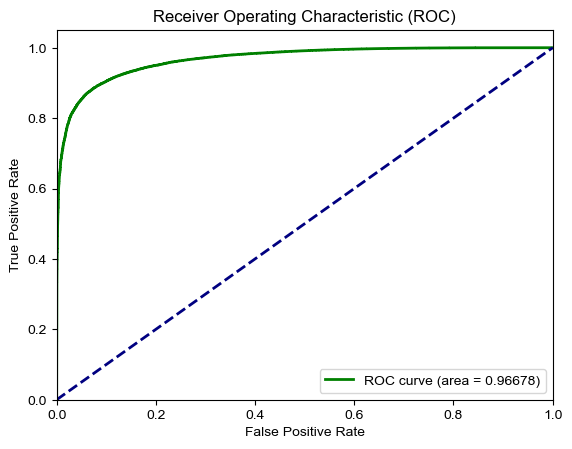

In [20]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

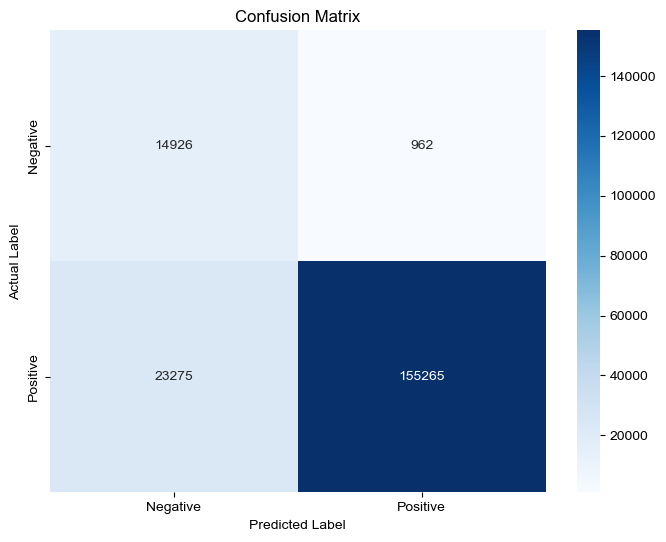

In [21]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.8753420114517212,
 'f1_macro': 0.9276003837585449,
 'f1_micro': 0.9276003837585449,
 'f1_weighted': 0.9276003837585449,
 'precision_macro': 0.9938423037528992,
 'recall_macro': 0.8696370720863342,
 'auc_macro': 0.9667826294898987}

In [23]:
pkl_file, folder = 'roberta-binary-FocalLoss_test', 'roberta-base'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.954443633556366,
  'all_metrics': {'accuracy': tensor(0.8338, device='cuda:0'),
   'auc_roc_macro': tensor(0.9544, device='cuda:0'),
   'confusion_matrix': tensor([[ 15237,    651],
           [ 31665, 146875]], device='cuda:0'),
   'f1': tensor(0.9009, device='cuda:0'),
   'f1_Macro': tensor(0.9009, device='cuda:0'),
   'f1_Micro': tensor(0.9009, device='cuda:0'),
   'f1_Weighted': tensor(0.9009, device='cuda:0'),
   'precision_macro': tensor(0.9956, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 9.9999e-01,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.2421, 0.2421, 0.2421,  ..., 0.8072, 0.8072, 0.8072], device='cuda:0')),
   'recall_macro': tensor(0.8226, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.120

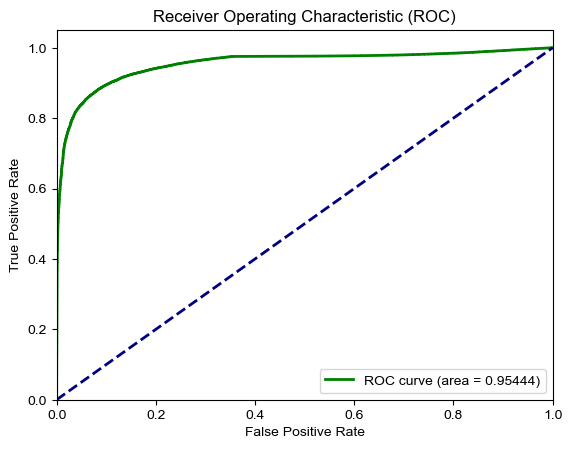

In [24]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

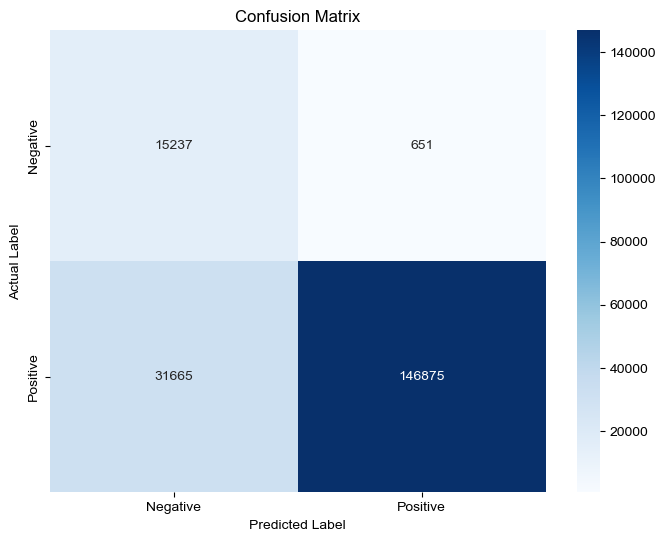

In [25]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.8337893486022949,
 'f1_macro': 0.9008912444114685,
 'f1_micro': 0.9008912444114685,
 'f1_weighted': 0.9008912444114685,
 'precision_macro': 0.9955872297286987,
 'recall_macro': 0.8226447701454163,
 'auc_macro': 0.954443633556366}

# Wiki Labels

In [27]:
pkl_file, folder = 'DistilBERT-binary-FocalLoss_wiki_test', 'distilbert-base-cased'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9755372405052185,
  'all_metrics': {'accuracy': tensor(0.9387, device='cuda:0'),
   'auc_roc_macro': tensor(0.9755, device='cuda:0'),
   'confusion_matrix': tensor([[ 14184,   2041],
           [  7739, 135599]], device='cuda:0'),
   'f1': tensor(0.9652, device='cuda:0'),
   'f1_Macro': tensor(0.9652, device='cuda:0'),
   'f1_Micro': tensor(0.9652, device='cuda:0'),
   'f1_Weighted': tensor(0.9652, device='cuda:0'),
   'precision_macro': tensor(0.9852, device='cuda:0'),
   'precision_recall_curve': (tensor([0.8983, 0.8983, 0.8983,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.3953e-05, 6.9765e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.0881, 0.0889, 0.0890,  ..., 0.9312, 0.9314, 0.9363], device='cuda:0')),
   'recall_macro': tensor(0.9460, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 6.9765e-06, 1.39

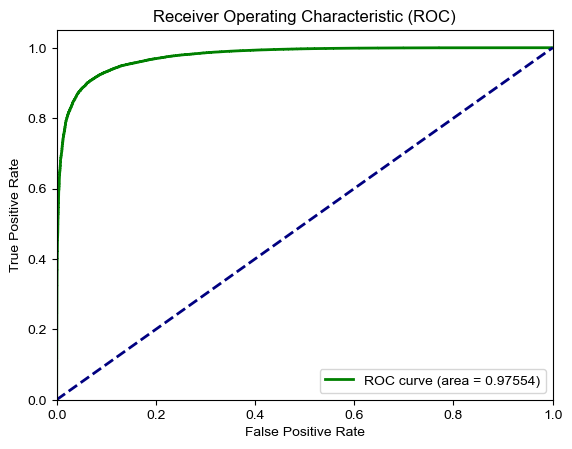

In [28]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

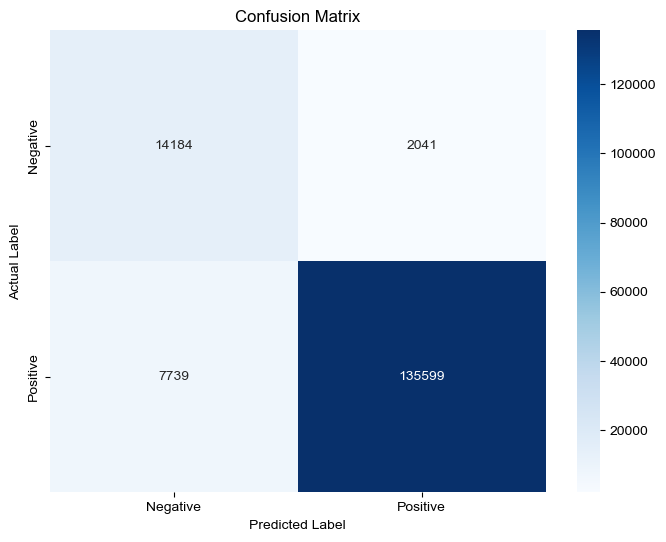

In [29]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.9387075901031494,
 'f1_macro': 0.9651930332183838,
 'f1_micro': 0.9651930332183838,
 'f1_weighted': 0.9651930332183838,
 'precision_macro': 0.9851714372634888,
 'recall_macro': 0.9460087418556213,
 'auc_macro': 0.9755372405052185}

## Bert Uncased

In [31]:
pkl_file, folder = 'BERT-binary-wiki_test-FocalLoss_test', 'BERT-Base-Uncased'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9769137501716614,
  'all_metrics': {'accuracy': tensor(0.9254, device='cuda:0'),
   'auc_roc_macro': tensor(0.9769, device='cuda:0'),
   'confusion_matrix': tensor([[ 14901,   1324],
           [ 10573, 132765]], device='cuda:0'),
   'f1': tensor(0.9571, device='cuda:0'),
   'f1_Macro': tensor(0.9571, device='cuda:0'),
   'f1_Micro': tensor(0.9571, device='cuda:0'),
   'f1_Weighted': tensor(0.9571, device='cuda:0'),
   'precision_macro': tensor(0.9901, device='cuda:0'),
   'precision_recall_curve': (tensor([0.8983, 0.8983, 0.8983,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.3953e-05, 6.9765e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.1268, 0.1273, 0.1276,  ..., 0.8519, 0.8525, 0.8558], device='cuda:0')),
   'recall_macro': tensor(0.9262, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 6.9765e-06, 1.39

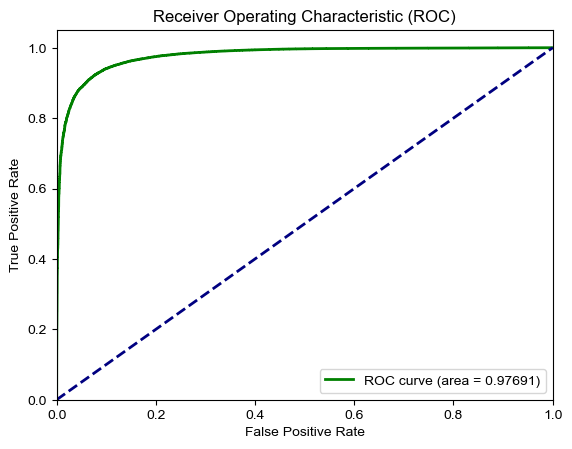

In [32]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

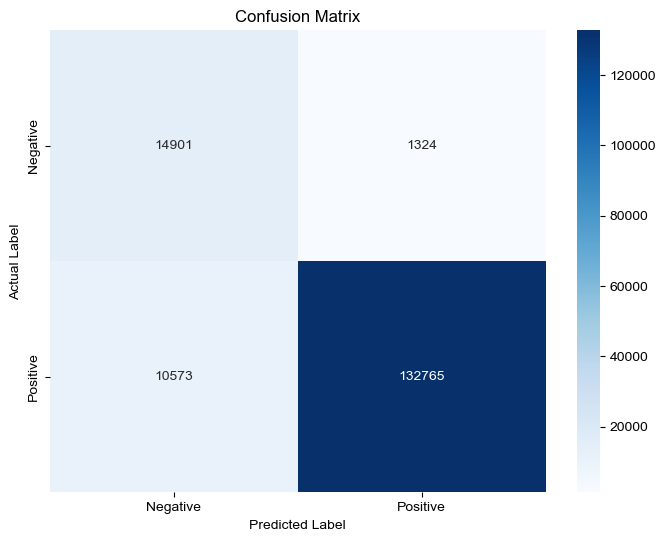

In [33]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.9254401326179504,
 'f1_macro': 0.9571166634559631,
 'f1_micro': 0.9571166634559631,
 'f1_weighted': 0.9571166634559631,
 'precision_macro': 0.9901259541511536,
 'recall_macro': 0.9262372851371765,
 'auc_macro': 0.9769137501716614}

## HateBERT

In [35]:
pkl_file, folder = 'HateBERT-binary-wiki_labels-FocalLoss_test', 'HateBert'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data = pkl.load(file)
    
    
data

[{'macro_auc': 0.9786913990974426,
  'all_metrics': {'accuracy': tensor(0.9271, device='cuda:0'),
   'auc_roc_macro': tensor(0.9787, device='cuda:0'),
   'confusion_matrix': tensor([[ 14953,   1272],
           [ 10358, 132980]], device='cuda:0'),
   'f1': tensor(0.9581, device='cuda:0'),
   'f1_Macro': tensor(0.9581, device='cuda:0'),
   'f1_Micro': tensor(0.9581, device='cuda:0'),
   'f1_Weighted': tensor(0.9581, device='cuda:0'),
   'precision_macro': tensor(0.9905, device='cuda:0'),
   'precision_recall_curve': (tensor([0.8983, 0.8983, 0.8983,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.3953e-05, 6.9765e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.1528, 0.1528, 0.1529,  ..., 0.8579, 0.8585, 0.8611], device='cuda:0')),
   'recall_macro': tensor(0.9277, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 6.9765e-06, 1.39

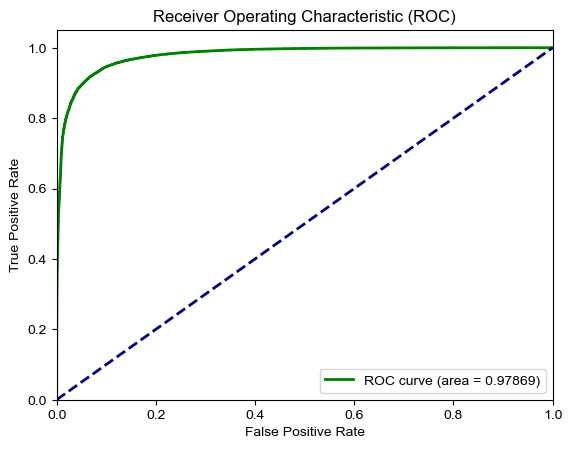

In [36]:
fpr = data[0]['all_metrics']['roc_curve'][0].cpu().numpy()  # False positive rate
tpr = data[0]['all_metrics']['roc_curve'][1].cpu().numpy()  # True positive rate

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.5f})'.format(data[0]['macro_auc']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) HateBERT')
plt.legend(loc="lower right")
plt.show()

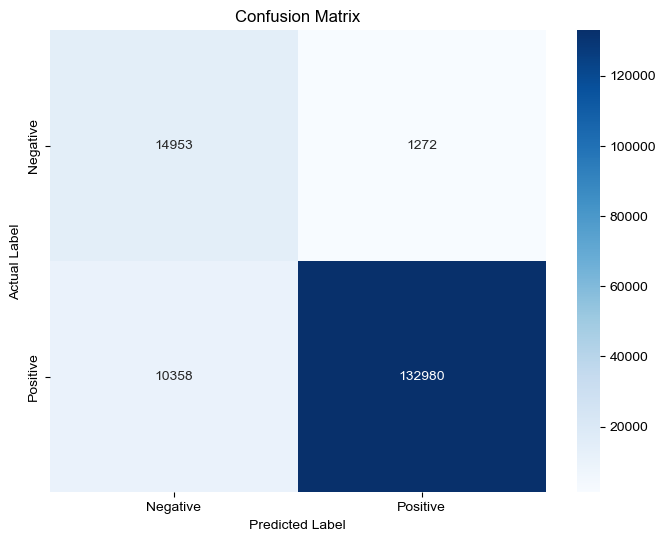

In [37]:
conf_matrix = data[0]['all_metrics']['confusion_matrix'].cpu().numpy()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
accuracy = data[0]['all_metrics']['accuracy'].item()
f1_macro = data[0]['all_metrics']['f1_Macro'].item()
f1_micro = data[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data[0]['all_metrics']['precision_macro'].item()
recall_macro = data[0]['all_metrics']['recall_macro'].item()
auc_macro = data[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.92711341381073,
 'f1_macro': 0.9581036567687988,
 'f1_micro': 0.9581036567687988,
 'f1_weighted': 0.9581036567687988,
 'precision_macro': 0.9905253052711487,
 'recall_macro': 0.9277372360229492,
 'auc_macro': 0.9786913990974426}

# Blacklist and accepting comments

In [7]:
folder = 'distilbert-base-cased'

In [8]:
pkl_file = 'blacklist-jigsaw-DistilBERT-binary-FocalLoss_test'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data_blacklist = pkl.load(file)
    
    
data_blacklist

[{'macro_auc': 0.961999773979187,
  'all_metrics': {'accuracy': tensor(0.9509, device='cuda:0'),
   'auc_roc_macro': tensor(0.9620, device='cuda:0'),
   'confusion_matrix': tensor([[175770,   2770],
           [  6768,   9120]], device='cuda:0'),
   'f1': tensor(0.6566, device='cuda:0'),
   'f1_Macro': tensor(0.6566, device='cuda:0'),
   'f1_Micro': tensor(0.6566, device='cuda:0'),
   'f1_Weighted': tensor(0.6566, device='cuda:0'),
   'precision_macro': tensor(0.7670, device='cuda:0'),
   'precision_recall_curve': (tensor([0.0817, 0.0817, 0.0817,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.2588e-04, 6.2941e-05,
            0.0000e+00], device='cuda:0'),
    tensor([0.0616, 0.0630, 0.0633,  ..., 0.8751, 0.8751, 0.8765], device='cuda:0')),
   'recall_macro': tensor(0.5740, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 6.2941e-05, 1.258

In [10]:
accuracy = data_blacklist[0]['all_metrics']['accuracy'].item()
f1_macro = data_blacklist[0]['all_metrics']['f1_Macro'].item()
f1_micro = data_blacklist[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data_blacklist[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data_blacklist[0]['all_metrics']['precision_macro'].item()
recall_macro = data_blacklist[0]['all_metrics']['recall_macro'].item()
auc_macro = data_blacklist[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.9509432911872864,
 'f1_macro': 0.6566347479820251,
 'f1_micro': 0.6566347479820251,
 'f1_weighted': 0.6566347479820251,
 'precision_macro': 0.7670311331748962,
 'recall_macro': 0.574018120765686,
 'auc_macro': 0.961999773979187}

In [9]:
pkl_file = 'not-offensive-Jigsaw-DistilBERT-binary-FocalLoss_test'
with open(f'../Metrics_results/{folder}/test/{pkl_file}.pkl', 'rb') as file:
    data_not_offensive = pkl.load(file)
    
    
data_not_offensive

[{'macro_auc': 0.9678604602813721,
  'all_metrics': {'accuracy': tensor(0.8890, device='cuda:0'),
   'auc_roc_macro': tensor(0.9679, device='cuda:0'),
   'confusion_matrix': tensor([[ 14726,   1162],
           [ 20411, 158129]], device='cuda:0'),
   'f1': tensor(0.9361, device='cuda:0'),
   'f1_Macro': tensor(0.9361, device='cuda:0'),
   'f1_Micro': tensor(0.9361, device='cuda:0'),
   'f1_Weighted': tensor(0.9361, device='cuda:0'),
   'precision_macro': tensor(0.9927, device='cuda:0'),
   'precision_recall_curve': (tensor([0.9183, 0.9183, 0.9183,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0'),
    tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.1202e-05, 5.6010e-06,
            0.0000e+00], device='cuda:0'),
    tensor([0.0797, 0.0798, 0.0799,  ..., 0.9920, 0.9921, 0.9925], device='cuda:0')),
   'recall_macro': tensor(0.8857, device='cuda:0'),
   'roc_curve': (tensor([0.0000, 0.0000, 0.0000,  ..., 0.9999, 0.9999, 1.0000], device='cuda:0'),
    tensor([0.0000e+00, 5.6010e-06, 1.12

In [11]:
accuracy = data_not_offensive[0]['all_metrics']['accuracy'].item()
f1_macro = data_not_offensive[0]['all_metrics']['f1_Macro'].item()
f1_micro = data_not_offensive[0]['all_metrics']['f1_Micro'].item()
f1_weighted = data_not_offensive[0]['all_metrics']['f1_Weighted'].item()
precision_macro = data_not_offensive[0]['all_metrics']['precision_macro'].item()
recall_macro = data_not_offensive[0]['all_metrics']['recall_macro'].item()
auc_macro = data_not_offensive[0]['all_metrics']['auc_roc_macro'].item()

metrics = {
    'accuracy' :accuracy,
    'f1_macro' : f1_macro,
    'f1_micro' :f1_micro,
    'f1_weighted': f1_weighted,
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'auc_macro' : auc_macro
}

metrics

{'accuracy': 0.8890437483787537,
 'f1_macro': 0.93614262342453,
 'f1_micro': 0.93614262342453,
 'f1_weighted': 0.93614262342453,
 'precision_macro': 0.9927051663398743,
 'recall_macro': 0.8856782913208008,
 'auc_macro': 0.9678604602813721}